In [50]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from scipy import integrate
from sympy import init_printing
import matplotlib.pylab as plt
init_printing() 


#1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q\right)^3 &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.
2. Encontrar la derivada empleanda la libreria simbolica
3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1. 

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.


Opcional.

Resolver el problema en 3D






In [68]:
def K_Lucy(r,h):
  T1 = (1+3*(r/h))*(1-(r/h))**3
  αD = 5/(np.pi*h**2)
  return αD*T1

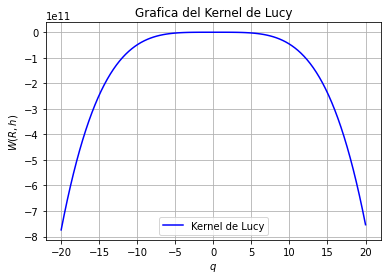

In [69]:
h_ = 0.1
r_ = np.linspace(-20,20,100)
plt.plot(r_,K_Lucy(r_,h_),'b', label = "Kernel de Lucy")
plt.xlabel('$q$')
plt.ylabel('$W(R,h)$')
plt.title("Grafica del Kernel de Lucy")
plt.legend()
plt.grid()
plt.show()

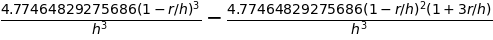

In [71]:
#Derivada kernel de lucy
r = sp.symbols("r")
h = sp.symbols("h")
fp = sp.diff(K_Lucy(r,h),r, 1)
fp

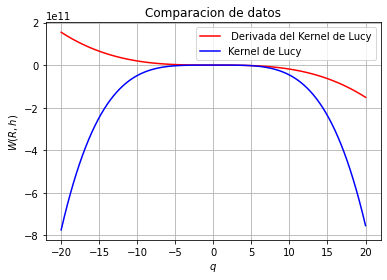

In [72]:
fp_ = sp.lambdify([r,h], fp, "numpy")
plt.plot(r_,fp_(r_,h_),'r', label = " Derivada del Kernel de Lucy")
plt.plot(r_,K_Lucy(r_,h_),'b', label = "Kernel de Lucy")
plt.xlabel('$q$')
plt.ylabel('$W(R,h)$')
plt.title("Comparacion de datos")
plt.legend()
plt.grid()
plt.show()




# 2.0 Integración

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

In [ ]:
#4
f1 = lambda x: np.exp(1-np.sqrt(x))
f2 = lambda x: 1/np.sqrt(np.tan(x))
f3 = lambda x: 1/(1+x**2)
f4 = lambda x,y: ((2*y*sp.sin(x))+sp.cos(x)**2)
f5 = lambda x: 1/np.log(x)

 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$


In [ ]:
lim_inf = 0
lim_sup = np.pi
x = np.linspace(lim_inf,lim_sup,1000)
trapecio = integrate.trapz(f1(x),x)
cuadratura = integrate.quad(f1,lim_inf,lim_sup,epsabs=1e-5)[0]
simpsons = integrate.simps(f1(x),x)
print(f'integral por la regla del trapecio: {trapecio}')
print(f'integral por el metodo de la cuadratura: {cuadratura}')
print(f'integral por la regla de simpson: {simpsons}')

integral por la regla del trapecio: 2.8755895688432083
integral por el metodo de la cuadratura: 2.8754911354375863
integral por la regla de simpson: 2.87555082821594


$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

In [ ]:
lim_inf = 0
lim_sup = np.pi/2
x = np.linspace(0.001,lim_sup,1000000)
trapecio = integrate.trapz(f2(x),x,dx=1)
cuadratura = integrate.quad(f2,lim_inf,lim_sup,epsabs=1e-5)[0]
simpsons = integrate.simps(f2(x),x)
print(f'integral por la regla del trapecio: {trapecio}')
print(f'integral por el metodo de la cuadratura: {cuadratura}')
print(f'integral por la regla de simpson: {simpsons}')

integral por la regla del trapecio: 2.1581959208220867
integral por el metodo de la cuadratura: 2.221441469079092
integral por la regla de simpson: 2.1581959177428494


$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


In [ ]:
lim_inf = -np.inf
lim_sup = np.inf
x = np.linspace(-1000,1000,10000)
trapecio = integrate.trapz(f3(x),x)
cuadratura = integrate.quad(f3,lim_inf,lim_sup,epsabs=1e-5)[0]
simpsons = integrate.simps(f3(x),x)
print(f'integral por la regla del trapecio: {trapecio}')
print(f'integral por el metodo de la cuadratura: {cuadratura}')
print(f'integral por la regla de simpson: {simpsons}')

integral por la regla del trapecio: 3.1395926542429824
integral por el metodo de la cuadratura: 3.141592653589793
integral por la regla de simpson: 3.1395926542563206


$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


In [ ]:
x = sp.symbols("x")
y = sp.symbols("y")
I = sp.integrate(f4(x,y),(y,sp.sin(x),sp.cos(x)))
I1 = sp.lambdify([x], I, "numpy")

lim_inf = 0
lim_sup = np.pi/4
x = np.linspace(lim_inf,lim_sup,10000)
trapecio = integrate.trapz(I1(x),x)
cuadratura = integrate.quad(I1,lim_inf,lim_sup,epsabs=1e-5)[0]
simpsons = integrate.simps(I1(x),x)
print(f'integral por la regla del trapecio: {trapecio}')
print(f'integral por el metodo de la cuadratura: {cuadratura}')
print(f'integral por la regla de simpson: {simpsons}')


integral por la regla del trapecio: 0.511844634220247
integral por el metodo de la cuadratura: 0.5118446353109126
integral por la regla de simpson: 0.511844635310852


$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$

In [ ]:
lim_inf = np.exp(1)
lim_sup = 2*np.exp(1)
x = np.linspace(lim_inf,lim_sup,1000)
trapecio = integrate.trapz(f5(x),x)
cuadratura = integrate.quad(f5,lim_inf,lim_sup,epsabs=1e-5)[0]
simpsons = integrate.simps(f5(x),x)
print(f'integral por la regla del trapecio: {trapecio}')
print(f'integral por el metodo de la cuadratura: {cuadratura}')
print(f'integral por la regla de simpson: {simpsons}')

integral por la regla del trapecio: 2.003810749013251
integral por el metodo de la cuadratura: 2.0038105616240243
integral por la regla de simpson: 2.0038105619858713


5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity


6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

In [ ]:
#5
g = 9.8
R = 6371000
f = lambda z: z**-2
I = integrate.quad(f,1,np.inf)[0]
v = np.sqrt(2*g*R*I)
print(f'la velocidad de escape: {v:2f} m/s')

la velocidad de escape: 11174.596190 m/s


In [52]:
#6
N = lambda t: np.exp(-t)
def I(f,lim_inf,lim_sup):
 x = np.linspace(lim_inf,lim_sup,1000)
 trapecio = integrate.trapz(f(x),x)
 cuadratura = integrate.quad(f,lim_inf,lim_sup)[0]
 simpsons = integrate.simps(f(x),x)

In [58]:
n = [2, 10, 20 , 40 , 80, 160]
trapecio = []
simpsons = []
cuadratura = []
exact = []
for i in n:
  exact.append(1 - np.exp(-i))
  lim_inf = 0
  lim_sup = i
  x = np.linspace(lim_inf,lim_sup,1000)
  trapecio.append(integrate.trapz(N(x),x))
  cuadratura.append(integrate.quad(N,lim_inf,lim_sup,args=(),full_output=0)[0])
  simpsons.append(integrate.simps(N(x),x))



In [64]:
e1 = [np.abs(i-j)/j for j,i in zip(exact,trapecio)]
e2 = [np.abs(i-j)/j for j,i in zip(exact,cuadratura)]
e3 = [np.abs(i-j)/j for j,i in zip(exact,simpsons)]
df1 = pd.DataFrame({"N":n,"ϵT":e1, "ϵS": e3, "eG": e2})
df1

,N,ϵT,ϵS,eG
0,2,3.340010e-07,4.387487e-10,1.283993e-16
1,10,8.350011e-06,4.164267e-08,0.000000e+00
2,20,3.339988e-05,3.318922e-07,0.000000e+00
3,40,1.335968e-04,2.635769e-06,0.000000e+00
4,80,5.343445e-04,2.078044e-05,0.000000e+00
5,160,2.136693e-03,1.614822e-04,0.000000e+00
